# **Project Understanding**

**Organization Background:** HELP International is an international humanitarian NGO committed to fighting poverty and providing basic facilities and assistance to people in underdeveloped countries during disasters and natural disasters.

**Problem:** About $10 million has been raised by HELP International. CEOs of NGOs must now choose how to strategically and profitably use this funding. Therefore, the CEO must decide which nations require the most assistance.

**Objective:** To categorize countries using socio-economic and health factors to identify which countries need financial assistance the most.

**Dataset Variable Description**

After thoroughly understanding the project case, we must first identify our variables in the dataset. So, we have a clearer picture of what data we’re dealing with.

country: Name of the country

child_mort: Death of children under five years of age per 1000 live births

exports: Exports of goods and services per capita. As a percentage of the GDP per capita

health: Total health spending per capita. As a percentage of GDP per capita

import: Imports of goods and services per capita. As a percentage of the GDP per capita

income: Net income per person

inflation: The measurement of the annual growth rate of the Total GDP

life_expec: The average number of years a newborn child would live if the current mortality patterns are to remain the same

total_fer: The number of children that would be born to each woman if the current age-fertility rates stay the same.

gdpp: The GDP per capita. Calculated as the total GDP divided by the total population.

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
import sklearn.cluster as skc
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Country-data.csv')
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

We can see that the dataset consists of 167 observations across 10 variables.

Display the statistics descriptive for the dataset using df.describe(). For numeric data, the result’s index will include count, mean, std, min, and max, as well as lower, middle (median), and upper percentiles.

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Data Cleaning**

In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Fortunately, this dataset contains no missing values. We’ll use visualization methods to look for trends and outliers in our collected data.

In [7]:
df[df.duplicated(keep=False)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


As the above result, there are no duplicated values in our dataset.

**Data Visualization**

Histogram

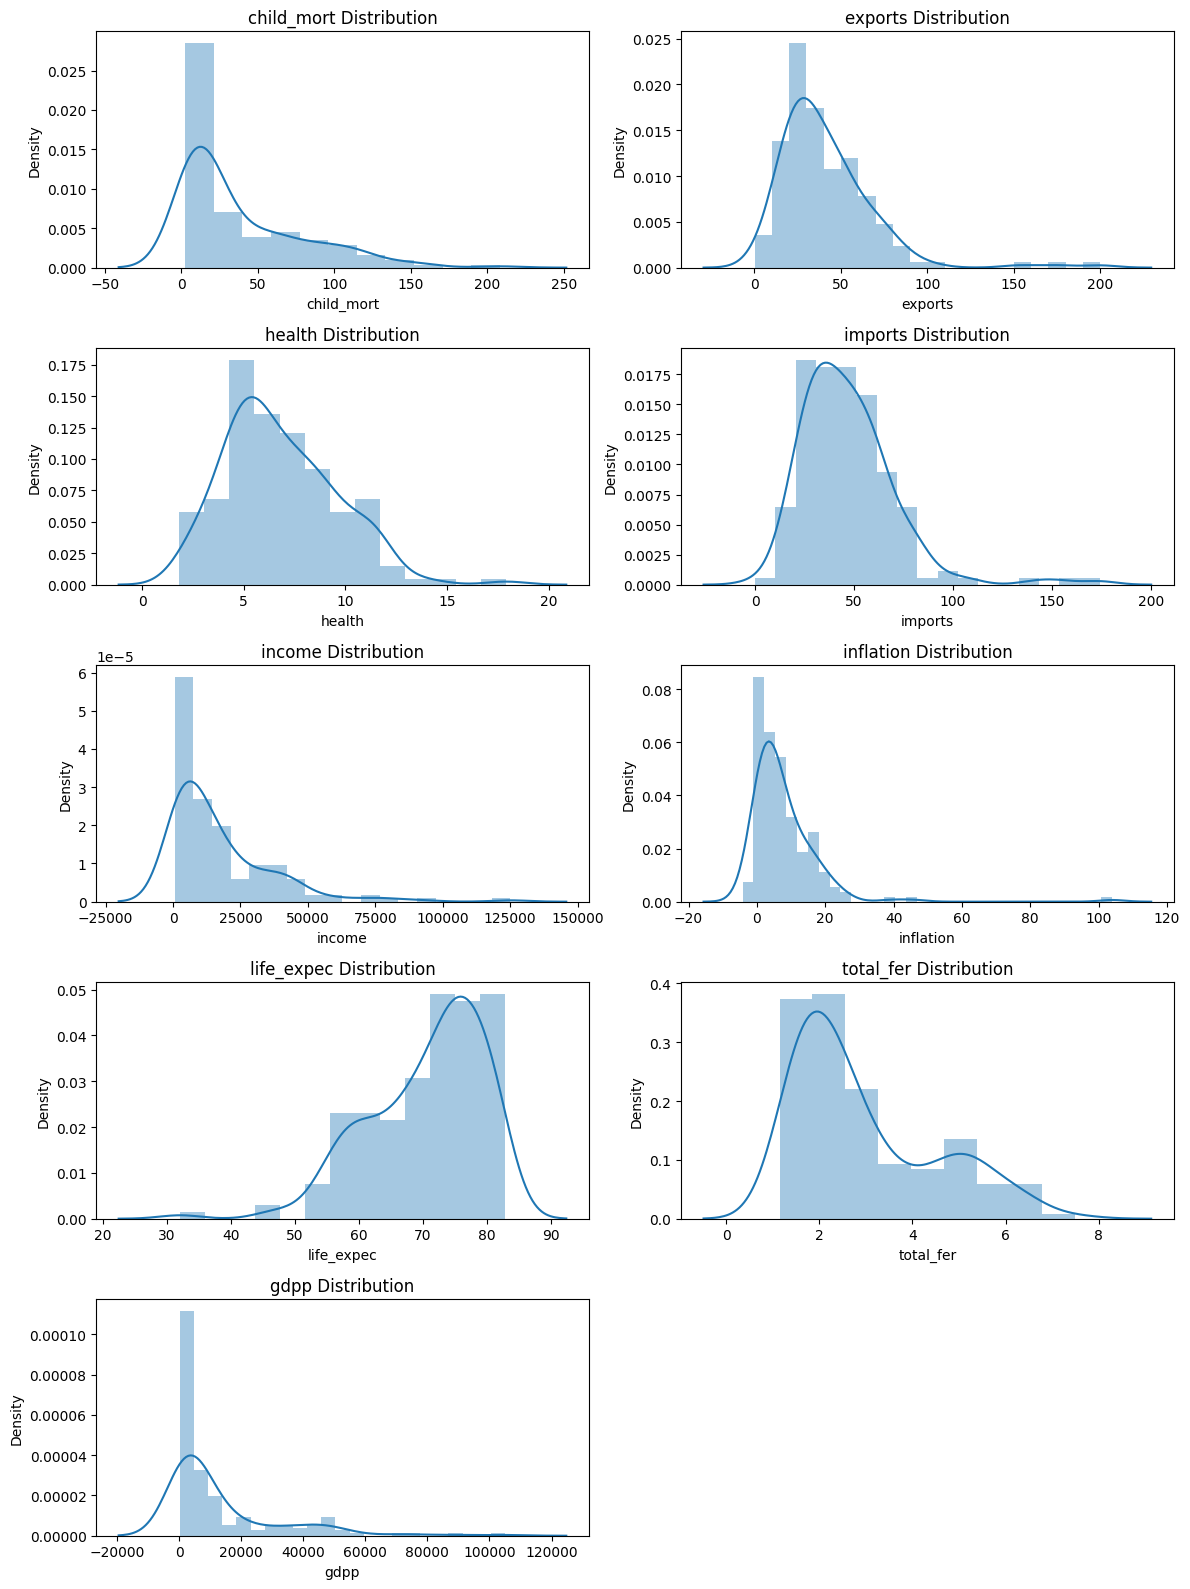

In [8]:
# Visualize the distribution of each variable.
plt.figure(figsize=(12,16))
for i, j in enumerate(df.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()

As we can see from the above histogram of our dataset, we can gather some information below about our data distribution of each variable:

child_mort: Have right-skewed distribution.

exports: Have right-skewed distribution.

health: Have right-skewed distribution.

import: Have right-skewed distribution.

income: Have right-skewed distribution.

inflation: Have right-skewed distribution.

life_expec: Have left-skewed distribution.

total_fer: Have right-skewed distribution.

gdpp: Have right-skewed distribution.

Box Plot

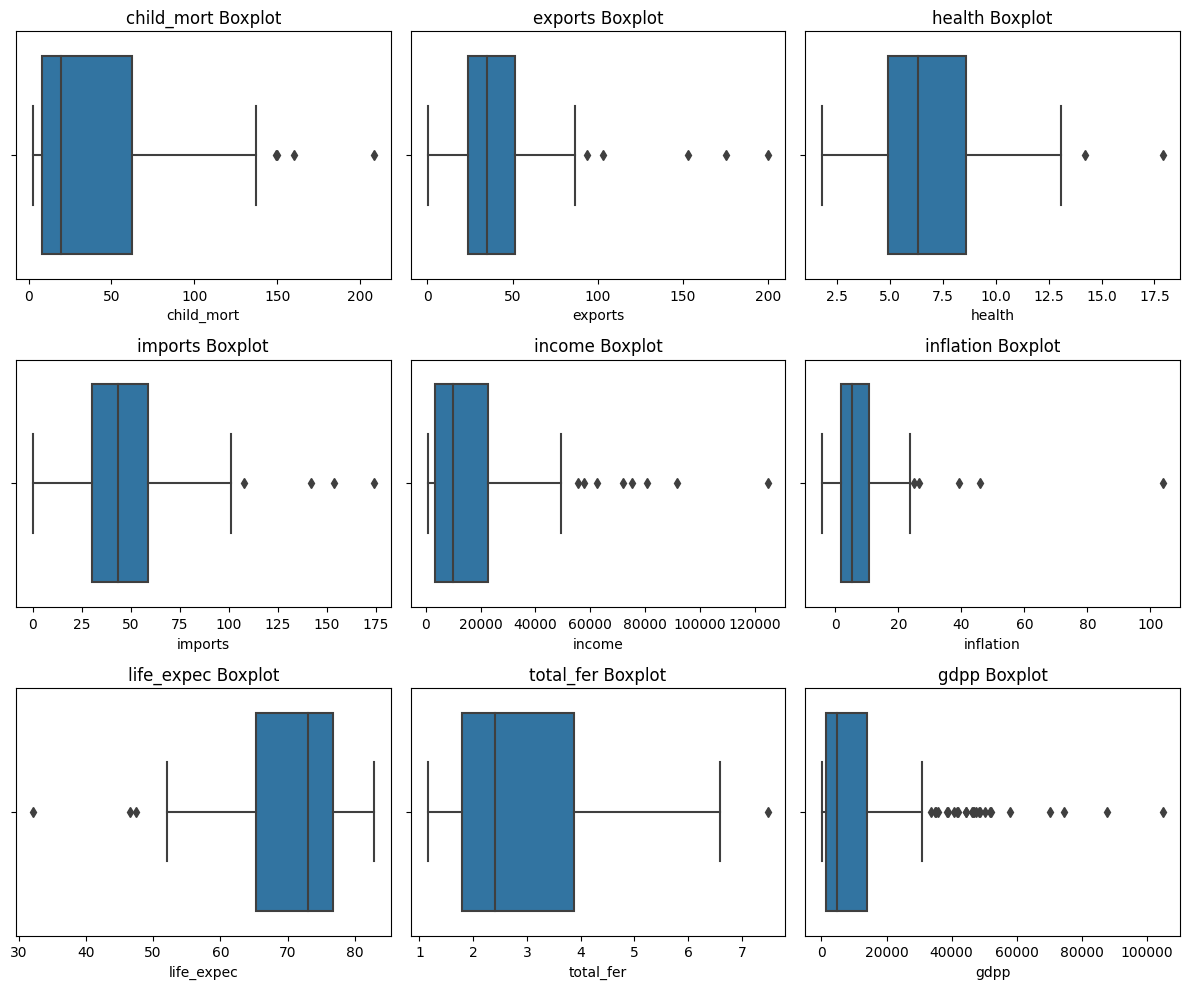

In [9]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(df.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

Since it reveals actual variations that exist in these countries, we will not currently delete the outliers. However, some are very high, while others are very low. Therefore, we must recheck outliers after choosing the best features we want to use for clustering.

The boxplot shows that the GDP per capita (gdpp) and income are the variables with the most outliers. Therefore, later we must evaluate which nations are qualified for financial aid based on the project case, considering each nation’s economy and level of health.

As we can see from the boxplot, the gdpp variable is similar to the income variable. Therefore, it is better to know how these two variables relate in a scatterplot.

Scatterplot

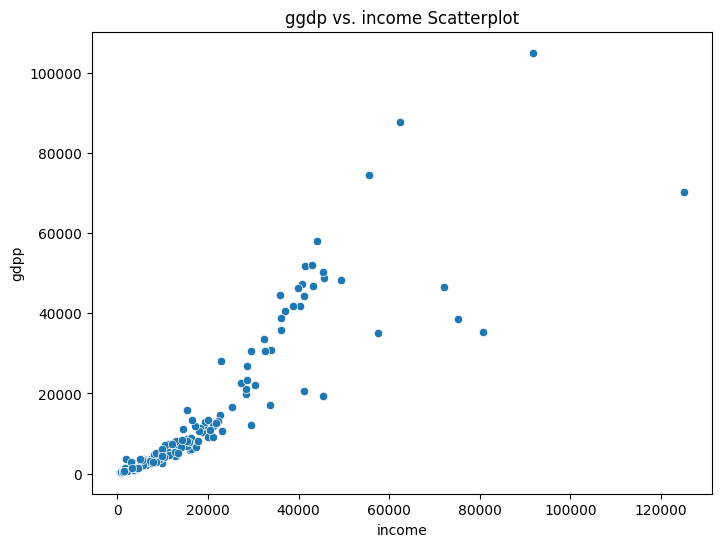

In [10]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df.income, y=df.gdpp)
plt.title('ggdp vs. income Scatterplot')
plt.savefig('scatter.png')
plt.show()

As we can see from the above scatterplot, these two variables have a strong positive relationship. As income increases, ggdp also increases.

Correlation Matrix

we can use .heatmap() function combined with the .corr() function to display the relationship between each variable in the dataset based on the correlation coefficient.

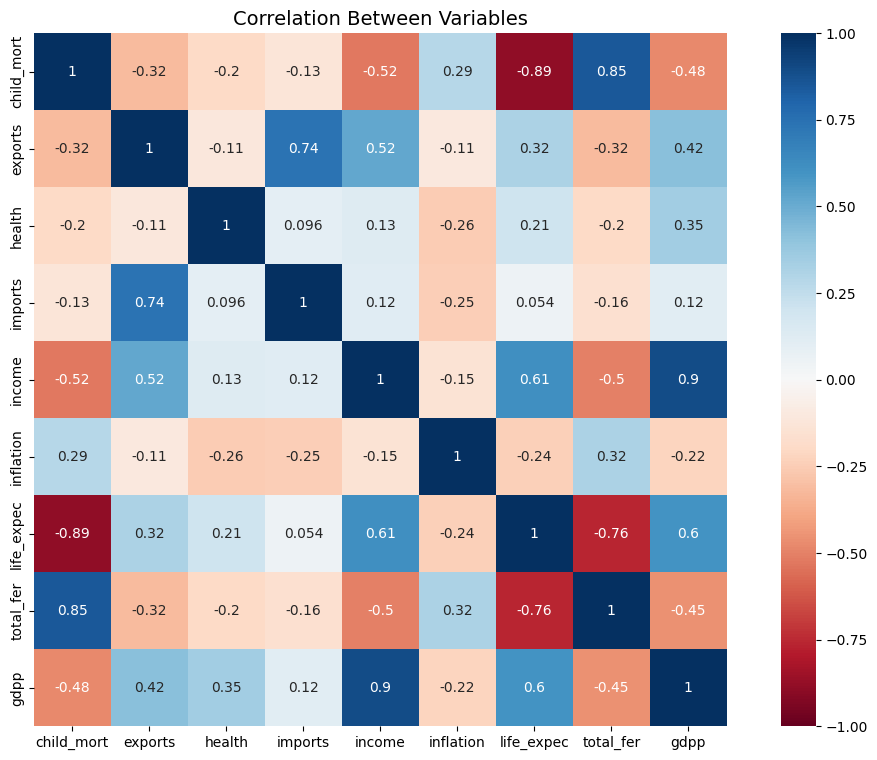

In [11]:
correlation_metrics=df.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

From the above showed heatmap, we can list our findings of the correlations between two variables from our dataset below:

income & gdpp (very strong positive correlation)

life_expec & total_fer (strong negative correlation)

total_fer & child_mort (strong positive correlation)

life_expec & child_mort (strong negative correlation)

exports & imports (strong positive correlation)

life_expec & gdpp (moderate positive correlation)

life_expec & income (moderate positive correlation)

income & child_mort (moderate negative correlation)

income & export (moderate positive correlation)

**Feature Selection**

To determine the best features, we need to review the purpose of this project. This project aims “to categorize countries using socio-economic and health factors to identify which countries need financial aid the most”.

Income and GDP per Capita (gdpp) are the best features to represent a country’s socio-economic factors. But, we consider using only the income variable to represent the socio-economic factors because the income and gdpp variable strongly correlate. Therefore, we surely don’t want to give financial aid to a country with a high income.

Let’s find the best fit variable that can be a feature to represent a health factor of a country and have a correlation with the income.

As we can see from the correlation heatmap of our dataset, the income variable has medium correlations with the child_mort, exports, and life_expect. Therefore, for this analysis, we will use the child_mort variable as the feature that will represent the health factor of a country.

So, we will proceed by using income and child_mort variables as our feature for clustering.

**Features Outliers Handling**

To reduce the number of countries we select, we can filter to countries with an income below the median income to ensure that the company gives financial aid to the country that needs it the most. The median is used because the data distribution of income variable have a skewed shape, so it is wise to use the median value rather than the mean.

In [12]:
df_filter_income = df[df.income < df.income.median()]
df_filter_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Now with only simple filtering above, we can reduce our selection by almost 50%. After filtering, let’s display the histogram and boxplot of income and child_mort variable.

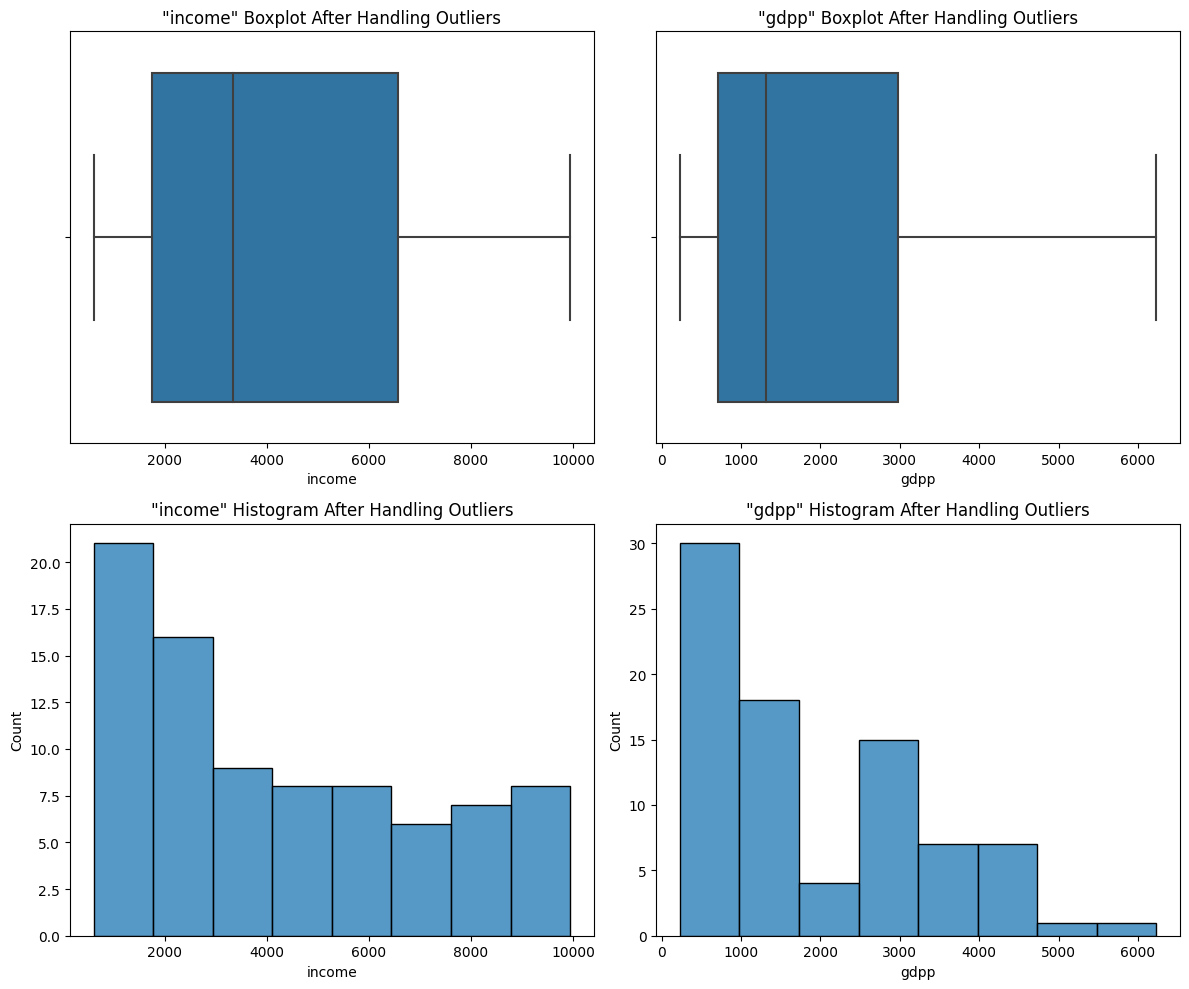

In [13]:
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x=df_filter_income["income"])
plt.title('"income" Boxplot After Handling Outliers')
plt.tight_layout()
plt.subplot(2,2,2)
sns.boxplot(x=df_filter_income["gdpp"])
plt.title('"gdpp" Boxplot After Handling Outliers')
plt.tight_layout()
plt.subplot(2,2,3)
sns.histplot(x=df_filter_income["income"])
plt.title('"income" Histogram After Handling Outliers')
plt.tight_layout()
plt.subplot(2,2,4)
sns.histplot(x=df_filter_income["gdpp"])
plt.title('"gdpp" Histogram After Handling Outliers')
plt.tight_layout()
plt.savefig('after_filter.png')
plt.show()

Based on the above charts, we can confidently proceed to the next step for clustering because the charts show no outliers, which indicates our dataset is now cleaner than before.

**K-Means Clustering**

Feature Scaling

In [14]:
# Create new data frame for Clustering
df_cluster = df_filter_income[['country', 'income', 'child_mort']].reset_index()
df_cluster.drop('index', inplace=True, axis=1)
display(df_cluster)

,country,income,child_mort
0,Afghanistan,1610,90.2
1,Albania,9930,16.6
2,Angola,5900,119.0
3,Armenia,6700,18.1
4,Bangladesh,2440,49.4
...,...,...,...
78,Uzbekistan,4240,36.3
79,Vanuatu,2950,29.2
80,Vietnam,4490,23.3
81,Yemen,4480,56.3


Now, we can start the scaling using **StandardScaler()** from the scikit-learn library.

In [15]:
# Scaling the new data frame for clustering
sc = skp.StandardScaler()
data_scale = np.array(df_cluster[['income', 'child_mort']])
scaled = sc.fit_transform(data_scale.astype(float))
scaled_df = pd.DataFrame(scaled, columns=['income', 'child_mort'])
display(scaled_df)

,income,child_mort
0,-0.920666,0.640089
1,1.977480,-1.132268
2,0.573691,1.333620
3,0.852359,-1.096147
4,-0.631548,-0.342414
...,...,...
78,-0.004545,-0.657874
79,-0.453897,-0.828848
80,0.082539,-0.970926
81,0.079055,-0.176255


Then, we need to check our scaled features’ correlation by visualizing them to ensure we do the scaling correctly.

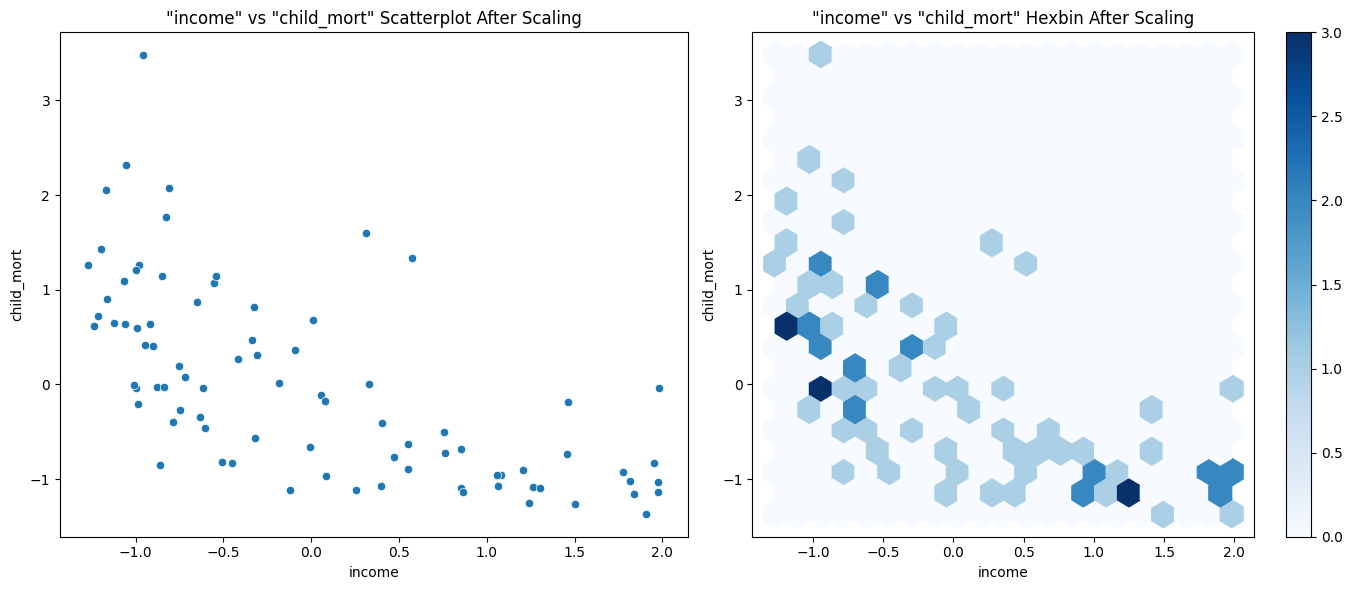

In [16]:
fig = plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(x=scaled_df["income"], y=scaled_df["child_mort"])
plt.title('"income" vs "child_mort" Scatterplot After Scaling')
plt.tight_layout()
plt.subplot(1,2,2)
hb = plt.hexbin(x=scaled_df["income"], y=scaled_df["child_mort"], gridsize = 20, cmap ='Blues')
cb = plt.colorbar(hb)
plt.title('"income" vs "child_mort" Hexbin After Scaling')
plt.xlabel('income')
plt.ylabel('child_mort')
plt.tight_layout()
plt.savefig('bivariate_filter_scaled.png')
plt.show()

There is no difference in the correlation shown before scaling, and after scaling, it seems that we are doing the scaling correctly.

Determine Number of Clusters

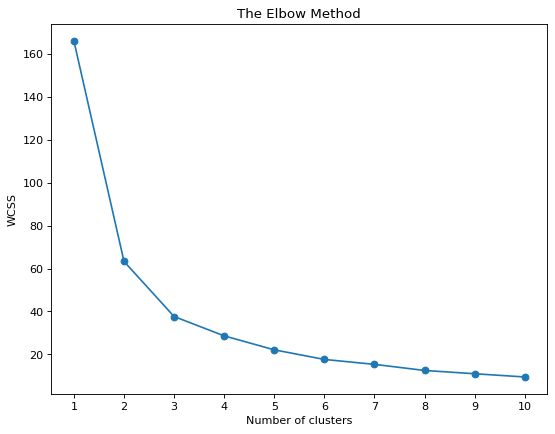

In [17]:
# Decide n-cluster using Elbow Method
wcss=[]
k_range = range(1,11)
for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')

plt.xticks(k_range)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('num_clust.png')
plt.show()

From the elbow curve, we can see that 3 clusters will be the best option to continue the clustering.

In [18]:
!pip install kneed

**Clustering (K = 3)**

In [19]:
# Clustering K Means, K=3
kmeans_3 = skc.KMeans(n_clusters=3,random_state=42)
kmeans_3.fit(scaled_df)
kmeans_3.labels_

array([2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [20]:
# Assign clustering result to each country in the data frame
df_cluster['cluster_id'] = kmeans_3.labels_
display(df_cluster)

,country,income,child_mort,cluster_id
0,Afghanistan,1610,90.2,2
1,Albania,9930,16.6,1
2,Angola,5900,119.0,2
3,Armenia,6700,18.1,1
4,Bangladesh,2440,49.4,0
...,...,...,...,...
78,Uzbekistan,4240,36.3,0
79,Vanuatu,2950,29.2,0
80,Vietnam,4490,23.3,0
81,Yemen,4480,56.3,0


In [21]:
# Number of countries in each cluster
df_cluster.cluster_id.value_counts(ascending=True)

2    24
1    28
0    31
Name: cluster_id, dtype: int64

It seems there is a similar number of countries in each cluster.

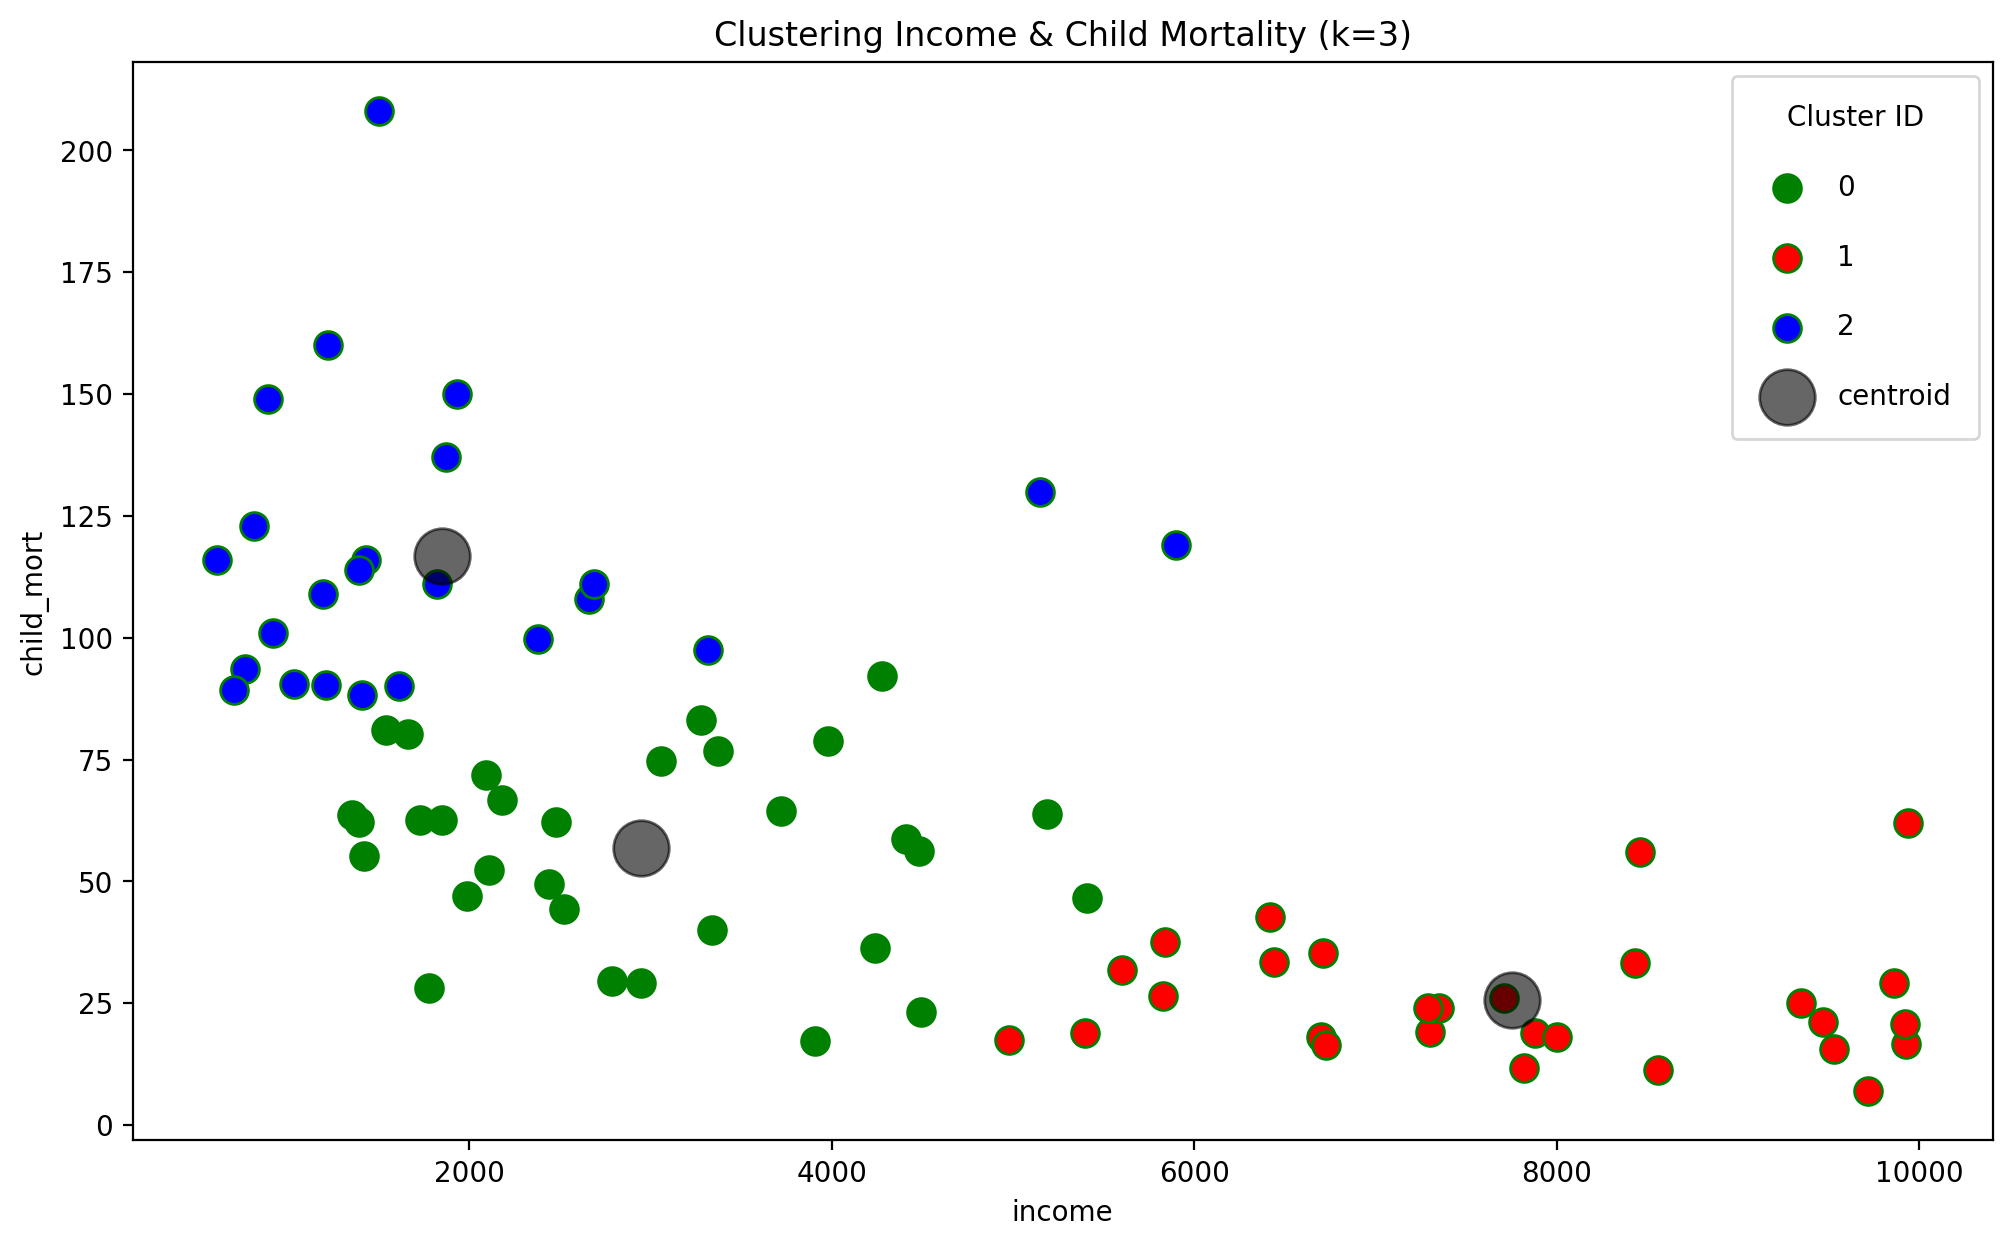

In [22]:
# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)
# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
plt.scatter(df_cluster.income[df_cluster.cluster_id == 0], df_cluster['child_mort'][df_cluster.cluster_id == 0], color = 'green', s=100, edgecolor = 'green', label= '0')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 1], df_cluster['child_mort'][df_cluster.cluster_id == 1], color = 'red', s=100, edgecolor = 'green', label = '1')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 2], df_cluster['child_mort'][df_cluster.cluster_id == 2], color = 'blue', s=100, edgecolor = 'green', label = '2')
ax.scatter(centroids_ori_scale[:, 0], centroids_ori_scale[:,1], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel('income')
plt.ylabel('child_mort')
plt.title("Clustering Income & Child Mortality (k=3)")
plt.savefig('cluster_result.png')
plt.show()

**Clustering (K=4)**

,country,income,child_mort,cluster_id
0,Afghanistan,1610,90.2,0
1,Albania,9930,16.6,1
2,Angola,5900,119.0,2
3,Armenia,6700,18.1,1
4,Bangladesh,2440,49.4,0
...,...,...,...,...
78,Uzbekistan,4240,36.3,3
79,Vanuatu,2950,29.2,3
80,Vietnam,4490,23.3,3
81,Yemen,4480,56.3,3


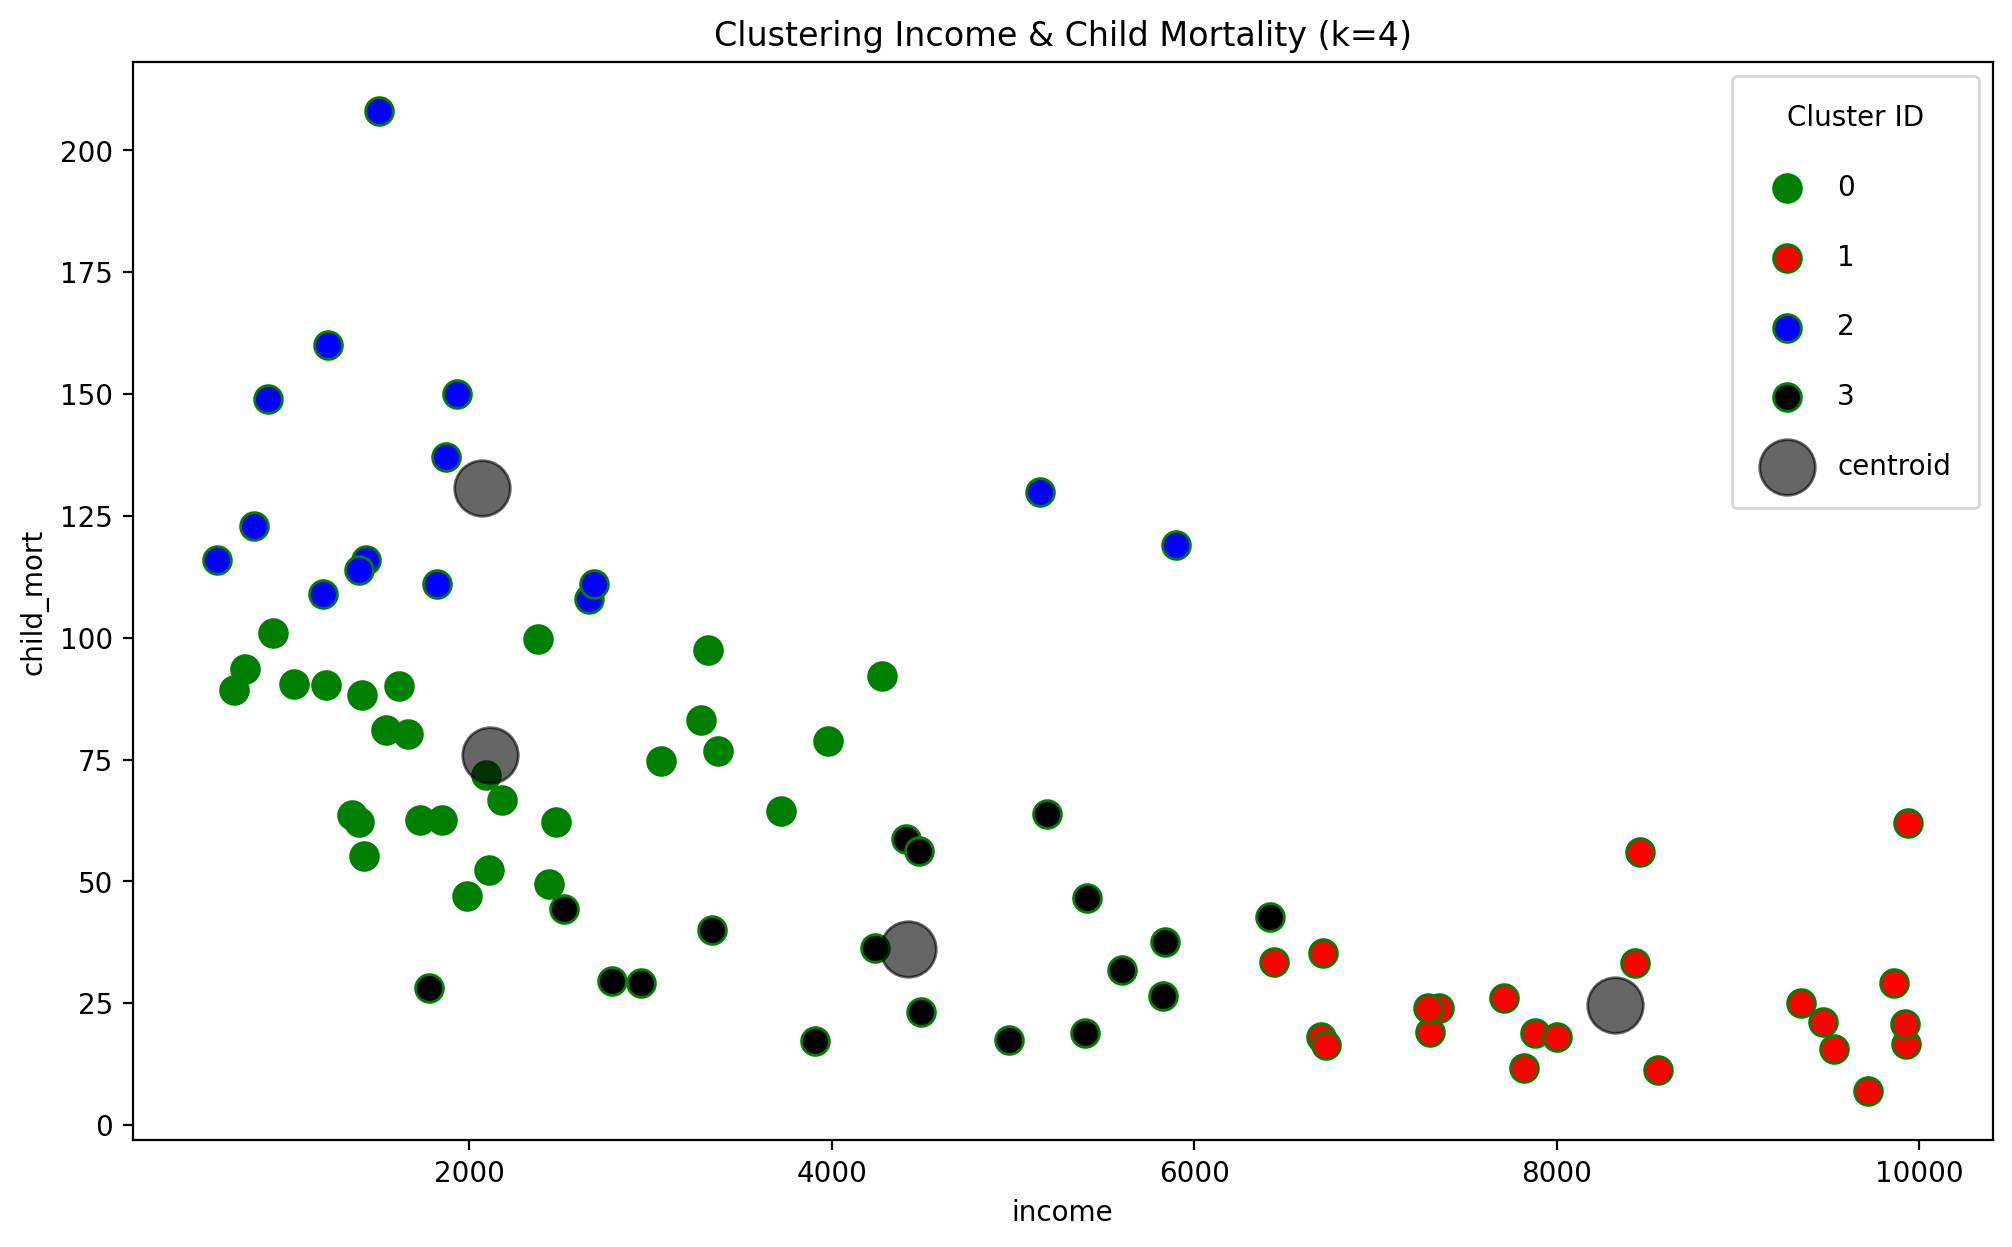

In [23]:
# Clustering K Means, K=4
kmeans_4 = skc.KMeans(n_clusters=4,random_state=42)
kmeans_4.fit(scaled_df)
kmeans_4.labels_

# Assign clustering result to each country in the data frame
df_cluster['cluster_id'] = kmeans_4.labels_
display(df_cluster)

# Number of countries in each cluster
df_cluster.cluster_id.value_counts(ascending=True)

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_4.cluster_centers_)
# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
plt.scatter(df_cluster.income[df_cluster.cluster_id == 0], df_cluster['child_mort'][df_cluster.cluster_id == 0], color = 'green', s=100, edgecolor = 'green', label= '0')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 1], df_cluster['child_mort'][df_cluster.cluster_id == 1], color = 'red', s=100, edgecolor = 'green', label = '1')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 2], df_cluster['child_mort'][df_cluster.cluster_id == 2], color = 'blue', s=100, edgecolor = 'green', label = '2')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 3], df_cluster['child_mort'][df_cluster.cluster_id == 3], color = 'black', s=100, edgecolor = 'green', label = '3')
ax.scatter(centroids_ori_scale[:, 0], centroids_ori_scale[:,1], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel('income')
plt.ylabel('child_mort')
plt.title("Clustering Income & Child Mortality (k=4)")
plt.savefig('cluster_result.png')
plt.show()

**Clustering (k=5)**

,country,income,child_mort,cluster_id
0,Afghanistan,1610,90.2,0
1,Albania,9930,16.6,2
2,Angola,5900,119.0,0
3,Armenia,6700,18.1,1
4,Bangladesh,2440,49.4,4
...,...,...,...,...
78,Uzbekistan,4240,36.3,1
79,Vanuatu,2950,29.2,4
80,Vietnam,4490,23.3,1
81,Yemen,4480,56.3,4


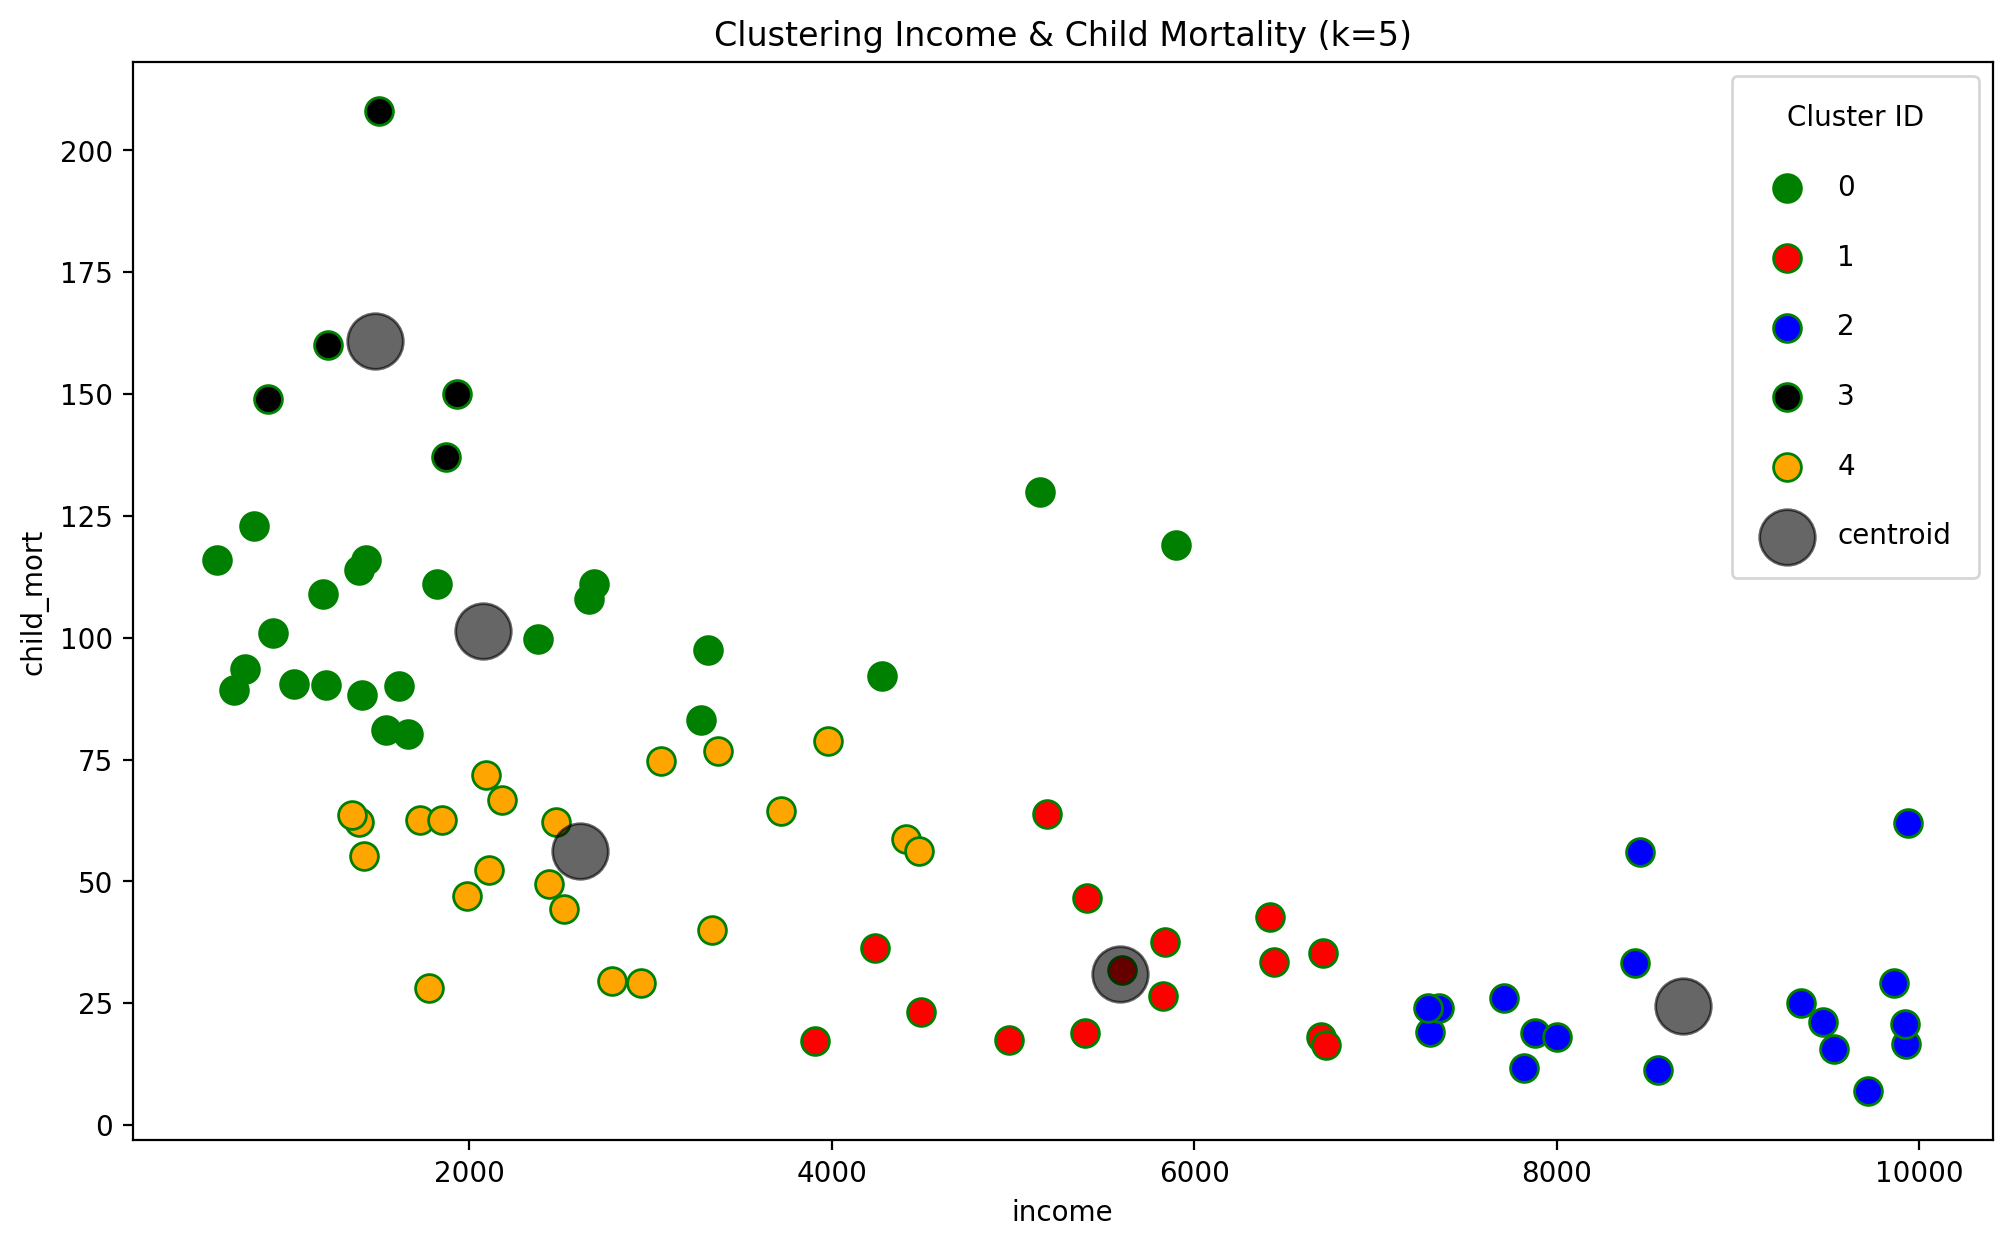

In [24]:
# Clustering K Means, K=5
kmeans_5 = skc.KMeans(n_clusters=5,random_state=42)
kmeans_5.fit(scaled_df)
kmeans_5.labels_

# Assign clustering result to each country in the data frame
df_cluster['cluster_id'] = kmeans_5.labels_
display(df_cluster)

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_5.cluster_centers_)
# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
plt.scatter(df_cluster.income[df_cluster.cluster_id == 0], df_cluster['child_mort'][df_cluster.cluster_id == 0], color = 'green', s=100, edgecolor = 'green', label= '0')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 1], df_cluster['child_mort'][df_cluster.cluster_id == 1], color = 'red', s=100, edgecolor = 'green', label = '1')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 2], df_cluster['child_mort'][df_cluster.cluster_id == 2], color = 'blue', s=100, edgecolor = 'green', label = '2')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 3], df_cluster['child_mort'][df_cluster.cluster_id == 3], color = 'black', s=100, edgecolor = 'green', label = '3')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 4], df_cluster['child_mort'][df_cluster.cluster_id == 4], color = 'orange', s=100, edgecolor = 'green', label = '4')
ax.scatter(centroids_ori_scale[:, 0], centroids_ori_scale[:,1], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel('income')
plt.ylabel('child_mort')
plt.title("Clustering Income & Child Mortality (k=5)")
plt.savefig('cluster_result.png')
plt.show()

In [25]:
# function to determine the best K value
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

3

**Recommendation**

Using KneeLocator, we got the probable k value is 3. So, let's analysis the scatterplot (k=3) and provide some meaningful recommendation.

According to the above scatterplot (k=3), the blue clusters (Cluster 2) are the most deserving of financial aid based on the results of the clustering. Where the net income per person is below 6000 and the death of children under 5 years of age per 1000 live births is above 85 children.

Let’s display the data frame of the 2nd cluster.

In [26]:
#Display 2nd Cluster
cluster2 = df_cluster[df_cluster.cluster_id == 2]
display(cluster2)

,country,income,child_mort,cluster_id
1,Albania,9930,16.6,2
5,Belize,7880,18.8,2
9,Bosnia and Herzegovina,9720,6.9,2
17,China,9530,15.7,2
22,Ecuador,9350,25.1,2
23,Egypt,9860,29.1,2
24,El Salvador,7300,19.2,2
26,Fiji,7350,24.1,2
36,Indonesia,8430,33.3,2
37,Jamaica,8000,18.1,2


There are still many countries in this cluster. Therefore, we should do further analysis to find the most suitable country to give financial aid to.

First, we can sort and visualize the ten lowest income countries from cluster 2.

,country,income,child_mort,cluster_id
0,Paraguay,7290,24.1,2
1,El Salvador,7300,19.2,2
2,Fiji,7350,24.1,2
3,Mongolia,7710,26.1,2
4,Ukraine,7820,11.7,2
5,Belize,7880,18.8,2
6,Jamaica,8000,18.1,2
7,Indonesia,8430,33.3,2
8,Namibia,8460,56.0,2
9,Sri Lanka,8560,11.2,2


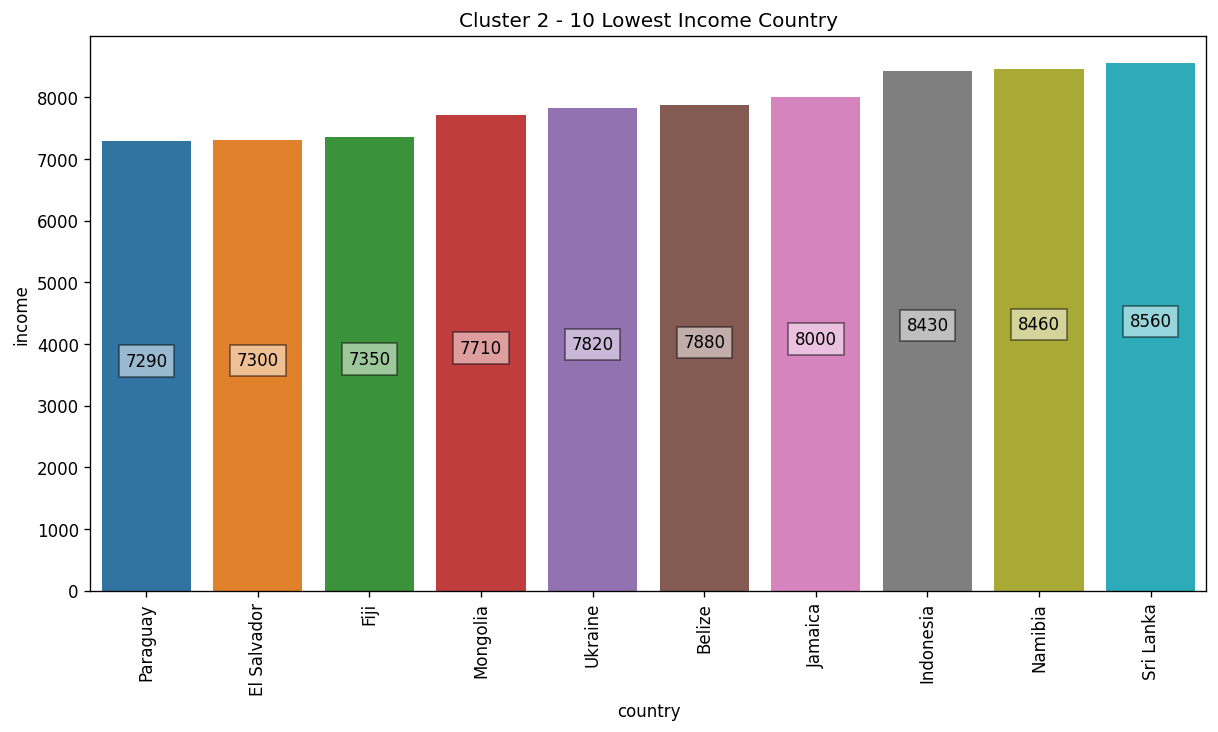

In [27]:
# Sort by lowest income
df_clust2_low_income = cluster2.sort_values('income').head(10).reset_index().drop('index', axis=1, inplace=False)
display(df_clust2_low_income)

# Visualize the sorted countries in a bar chart
x = df_clust2_low_income.country.tolist()
y= df_clust2_low_income.income.tolist()
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
sns.barplot(x=df_clust2_low_income.country, y=df_clust2_low_income.income)
ax.set_xticklabels(df_clust2_low_income.country, rotation = 90)
for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.title('Cluster 2 - 10 Lowest Income Country')
plt.savefig('cluster2_income_low.png', bbox_inches = 'tight')
plt.show()

Then we also need to sort and visualize the ten highest child_mort countries from cluster 2.

,country,income,child_mort,cluster_id
0,Turkmenistan,9940,62.0,2
1,Namibia,8460,56.0,2
2,Indonesia,8430,33.3,2
3,Egypt,9860,29.1,2
4,Mongolia,7710,26.1,2
5,Ecuador,9350,25.1,2
6,Paraguay,7290,24.1,2
7,Fiji,7350,24.1,2
8,Jordan,9470,21.1,2
9,St. Vincent and the Grenadines,9920,20.7,2


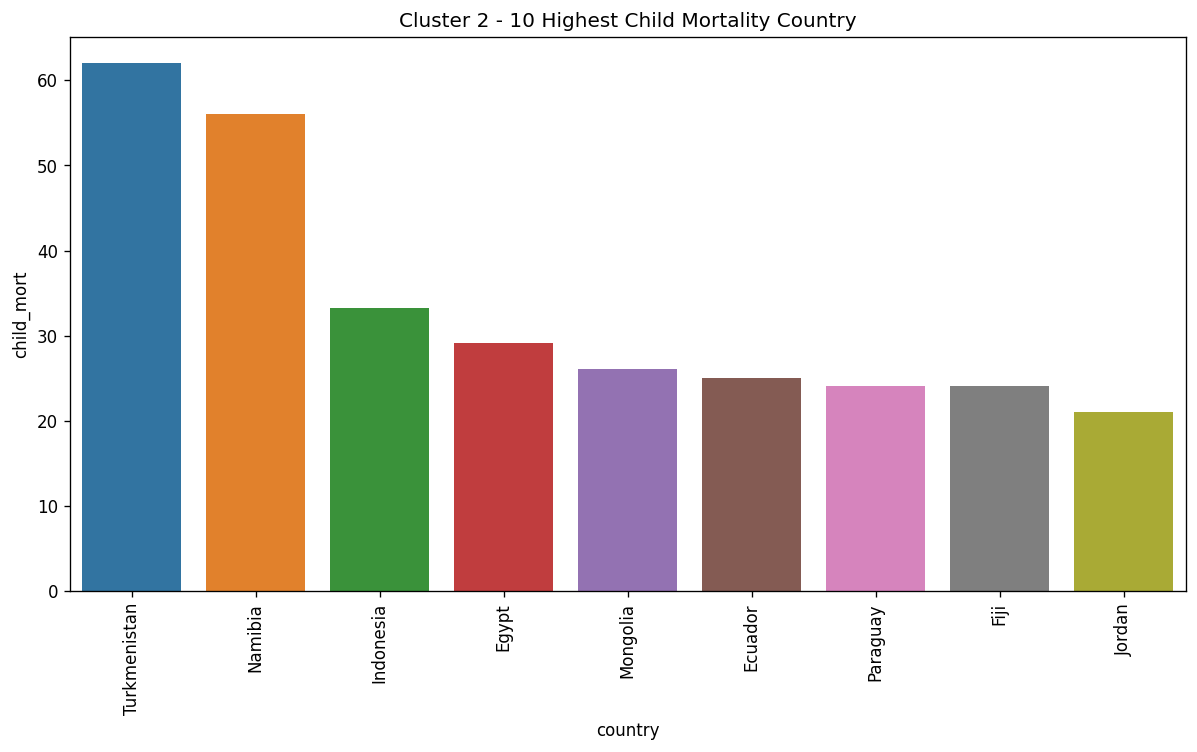

In [28]:
# Sort by highest child_mort
df_clust2_high_child_mort = cluster2.sort_values('child_mort', ascending=False).head(10).reset_index().drop('index', axis=1, inplace=False)
display(df_clust2_high_child_mort)
# Visualize the sorted countries in a bar chart
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
df_cluster2_sort_child_mort = cluster2.sort_values('child_mort', ascending=False).head(9)
sns.barplot(x=df_cluster2_sort_child_mort.country, y=df_cluster2_sort_child_mort.child_mort)
ax.set_xticklabels(df_cluster2_sort_child_mort.country, rotation = 90)
plt.title('Cluster 2 - 10 Highest Child Mortality Country')
plt.savefig('cluster2_child_high.png', bbox_inches = 'tight')
plt.show()

As the sorted charts above, we can take a list of some of the most suitable countries to give financial aid to. Here is the list of the countries:

**Congo**: The lowest income country and the 10th highest child mortality value country in cluster 2.

**Haiti**: The highest child mortality value country in cluster 2.

**Niger**: The 4th lowest income and the 7th highest child mortality value country in cluster 2.

**Central African Republic**: The 5th lowest income and the 4th highest child mortality value country in cluster 2.

**Sierra Leone**: The 2nd highest child mortality value and the 10th lowest income country in cluster 2.

# **Conclusion**

After conducting some analysis of the given data set, in accordance with the project understanding that we should recommend which countries are most in need of financial assistance based on the socio-economic and health factors of the country, we found a final list of suitable countries for assistance using the k -means clustering method.

Here is the list of the countries that we would recommend:

*   Congo
*   Haiti
*   Niger
*   Central African Republic
*   Sierra Leone